In [1]:
import numpy as np
import pandas as pd
import time

from sklearn.model_selection import cross_val_score

In [2]:
train = pd.read_csv('csv/toymodel3_extracted_10_feature_train.csv')
test = pd.read_csv('csv/toymodel3_extracted_10_feature_test.csv')

#train = pd.read_csv('csv/train_raw.csv')
#test = pd.read_csv('csv/test_raw.csv')

X_train = train.drop(['y'],axis = 1)
y_train = train['y']

X_test = test.drop(['y'],axis = 1)
y_test = test['y']

In [3]:
train.head()

,0,1,2,3,4,5,6,7,8,9,y
0,-5.493340,1.979221,5.452313,2.376600,-2.218290,-0.297500,-2.463372,-2.882947,3.689015,-3.339031,0
1,-1.176325,-0.024176,1.475685,0.602422,2.101266,-0.889643,-0.977984,-1.051256,1.076921,-0.077088,0
2,-2.055301,0.505205,2.598602,1.231147,0.399164,-0.236204,-1.028547,-1.181248,1.844412,0.637139,0
3,-3.687569,2.378079,7.798402,4.224250,-2.453051,1.493909,-1.960688,-2.135546,5.440852,2.422818,0
4,-4.934954,3.237987,10.771603,6.296090,-3.865475,2.072758,-2.735177,-2.709528,7.688848,1.484118,0


In [4]:
test.head()

,0,1,2,3,4,5,6,7,8,9,y
0,-3.234219,0.819130,3.966259,1.982672,-0.525784,0.005285,-1.504736,-1.748507,3.041729,-0.249186,0
1,-2.604147,-0.117799,2.004786,0.436196,0.860238,-0.698270,-1.525340,-1.841877,1.317717,-1.500715,0
2,-2.481026,-0.139611,1.426728,0.719935,1.593947,-1.215687,-1.519413,-1.494345,1.242624,-1.638686,0
3,0.008739,-0.328973,1.021129,-0.204420,0.432912,-0.862795,-1.379593,-1.242129,0.086241,-0.412957,0
4,-1.590194,0.503745,2.554368,0.851081,-0.795788,-0.262505,-1.524173,-1.656382,1.221394,-0.830454,0


# Logistic Regression

In [5]:
from sklearn.linear_model import LogisticRegression

start_time = time.time()

lg = LogisticRegression(C = np.power(10,4), solver='newton-cg', random_state=1)
lg.fit(X_train, y_train)

print("--- %s seconds ---" % (time.time() - start_time))

--- 0.024783849716186523 seconds ---


In [6]:
pre = lg.predict(train.drop(['y'],axis = 1))
(pre == y_train).mean()

0.9907120743034056

In [7]:
pre = lg.predict(test.drop(['y'],axis = 1))
(pre == y_test).mean()

0.59

In [8]:
cv_acc = cross_val_score(estimator = LogisticRegression(C = np.power(10,4), solver='newton-cg', random_state=1),
                         X=X_train,
                         y=y_train,
                         cv=5,
                         n_jobs=-1)
print('Kfold Accuracy: %.2f%%' % (np.mean(cv_acc)*100))

Kfold Accuracy: 97.52%


In [9]:
pre_prob = lg.predict_proba(X_test)
pre_prob = pre_prob[:,1]

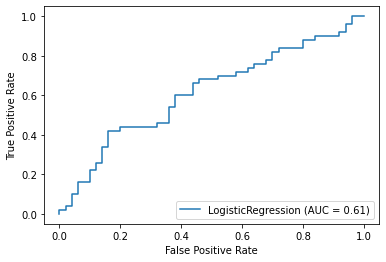

In [10]:
import sklearn.metrics as metrics
metrics.plot_roc_curve(lg, X_test, y_test)

In [11]:
metrics.roc_auc_score(y_test, pre_prob)

0.6148

# Decision Tree

### toy run

In [12]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy', max_depth=4, random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

In [13]:
pre = tree.predict(test.drop(['y'],axis = 1))
(pre == y_test).mean()

0.58

### cross validation

In [14]:
cv_acc = cross_val_score(estimator = DecisionTreeClassifier(random_state = 0),
                         X=X_train,
                         y=y_train,
                         cv=5,
                         n_jobs=-1)

In [15]:
print('Kfold Accuracy: %.2f%%' % (np.mean(cv_acc)*100))

Kfold Accuracy: 97.37%


### GridSearch

In [16]:
from sklearn.model_selection import GridSearchCV

param_grid = [{
               'max_depth': [1, 2, 3, 4, 5, 6, None],
               'criterion': ['gini', 'entropy']
              }]

gs = GridSearchCV(estimator = DecisionTreeClassifier(random_state=0),
                  param_grid=param_grid,
                  #iid=False,
                  refit=True,
                  n_jobs=-1,
                  cv=10)

gs.fit(X_train, y_train)

print('Best Accuracy: %.2f%%' % (gs.best_score_*100))
print('Best Params:', gs.best_params_)

Best Accuracy: 98.14%
Best Params: {'criterion': 'gini', 'max_depth': 2}


In [17]:
print('Best Accuracy: %.2f%%' % (gs.best_score_*100))
print('Best Params:', gs.best_params_)
print('Accuracy: %.2f%%' % (gs.best_estimator_.score(X_test, y_test)*100))

Best Accuracy: 98.14%
Best Params: {'criterion': 'gini', 'max_depth': 2}
Accuracy: 60.00%


In [18]:
tree = DecisionTreeClassifier(criterion = 'gini', max_depth=2, random_state=0)
tree.fit(X_train, y_train)
pre = tree.predict(test.drop(['y'],axis = 1))
print('Test Accuracy: %.2f%%' % ((pre == y_test).mean()*100))

Test Accuracy: 60.00%


# Random Forest

### toy run

In [19]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=4, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, random_state=0)

In [20]:
pre = clf.predict(test.drop(['y'],axis = 1))
(pre == y_test).mean()

0.57

### cross validation

In [21]:
from sklearn.model_selection import cross_val_score

cv_acc = cross_val_score(estimator = RandomForestClassifier(random_state = 0),
                         X=X_train,
                         y=y_train,
                         cv=5,
                         n_jobs=-1)

In [22]:
print('Kfold Accuracy: %.2f%%' % (np.mean(cv_acc)*100))

Kfold Accuracy: 97.83%


### Random Search and GridSearch

In [23]:
from sklearn.model_selection import RandomizedSearchCV

RF = RandomForestClassifier(random_state = 0)

para_random = {'n_estimators':list(np.arange(30,70)),
                'criterion': ['gini', 'entropy']
               }

rs = RandomizedSearchCV(estimator = RF,
                        param_distributions=para_random,
                        n_iter=20,
                        #iid=False,
                        n_jobs=-1,
                        refit=True,
                        cv=10)

rs.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=0),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'n_estimators': [30, 31, 32, 33, 34, 35,
                                                         36, 37, 38, 39, 40, 41,
                                                         42, 43, 44, 45, 46, 47,
                                                         48, 49, 50, 51, 52, 53,
                                                         54, 55, 56, 57, 58, 59, ...]})

In [24]:
print('Best Accuracy: %.2f%%' % (rs.best_score_*100))
print('Best Params:', rs.best_params_)
print('Accuracy: %.2f%%' % (rs.best_estimator_.score(X_test, y_test)*100))

Best Accuracy: 98.30%
Best Params: {'n_estimators': 69, 'criterion': 'gini'}
Accuracy: 57.00%


In [25]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators':list(np.arange(30,70)),
               'max_depth': [1, 2, 3, 4, 5, 6, None],
               'criterion': ['gini', 'entropy']
              }]

gs = GridSearchCV(estimator=RandomForestClassifier(random_state=0),
                  param_grid=param_grid,
                  #iid=False,
                  refit=True,
                  n_jobs=-1,
                  cv=10)

gs.fit(X_train, y_train)

print('Best Accuracy: %.2f%%' % (gs.best_score_*100))
print('Best Params:', gs.best_params_)

Best Accuracy: 98.45%
Best Params: {'criterion': 'gini', 'max_depth': 1, 'n_estimators': 39}


In [26]:
print('Best Accuracy: %.2f%%' % (rs.best_score_*100))
print('Best Params:', rs.best_params_)
print('Accuracy: %.2f%%' % (rs.best_estimator_.score(X_test, y_test)*100))

Best Accuracy: 98.30%
Best Params: {'n_estimators': 69, 'criterion': 'gini'}
Accuracy: 57.00%


In [27]:
clf = RandomForestClassifier(max_depth=1, random_state=0, n_estimators =  39, criterion = 'gini')
clf.fit(X_train, y_train)
pre = clf.predict(test.drop(['y'],axis = 1))
print('Test Accuracy: %.2f%%' % ((pre == y_test).mean()*100))

Test Accuracy: 53.00%


# K Nearest Neighbor

In [28]:
class KNN:
    def __init__(self, k, dis = None):
        self.k = k
        if dis == None:
            self.dis = self._euclidean
        
    def _euclidean(self, x, y):
        return np.sqrt(np.sum((x - y)**2))
    
    def fit(self, X, y):
        self.feature = X
        self.label = y
        self.uniq = np.unique(y)
        
    def nearest(self, new_single):   ## find nearest indices
        train_dis = self.feature.apply(lambda x: self.dis(new_single, x), axis = 1)
        return train_dis.sort_values().index     #  return the index of nearest value, np.argsort() cannot handle when self.feature is shuffled
        
    def predict(self, new):
        if new.ndim == 1:
            #print(self.nearest(new))
            k_ind = self.nearest(new)[:self.k]
            k_label = self.label[k_ind]
            count = np.bincount(k_label, minlength = self.uniq.shape[0])
            #print(count)
            pre = np.argmax(count)
            return pre
        
        pre = np.ones(new.shape[0])
        for i in range(new.shape[0]):
            #print(new)
            k_ind = self.nearest(new.iloc[i])[:self.k]
            k_label = self.label[k_ind]
            #print(k_ind)
            count = np.bincount(k_label, minlength = self.uniq.shape[0])
            
            pre[i] = np.argmax(count)
            
        return pre  

In [29]:
K = KNN(int(round(np.sqrt(X_train.shape[0]))))
K.fit(X_train, y_train)

In [30]:
pre = K.predict(X_test)

In [31]:
(pre == y_test).mean()

0.57

In [32]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors = int(round(np.sqrt(X_train.shape[0]))))
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=25)

In [34]:
(neigh.predict(X_train) == y_train).mean()

0.9860681114551083

In [33]:
(neigh.predict(X_test) == y_test).mean()

0.57

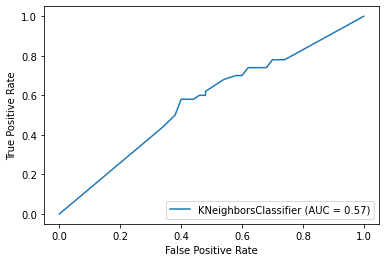

In [36]:
metrics.plot_roc_curve(neigh, X_test, y_test)

In [37]:
pre_prob = neigh.predict_proba(X_test)
pre_prob = pre_prob[:,1]

In [38]:
metrics.roc_auc_score(y_test, pre_prob)

0.5686

### cross validation

In [39]:
from sklearn.model_selection import cross_val_score

cv_acc = cross_val_score(estimator = KNeighborsClassifier(n_neighbors = int(round(np.sqrt(X_train.shape[0])))),
                         X=X_train,
                         y=y_train,
                         cv=5,
                         n_jobs=-1)

print('Kfold Accuracy: %.2f%%' % (np.mean(cv_acc)*100))

Kfold Accuracy: 98.45%


### GridSearch

In [40]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_neighbors': list(range(3,50)),
               'p': [1,2]
              }]

gs = GridSearchCV(estimator=KNeighborsClassifier(),
                  param_grid=param_grid,
                  #iid=False,
                  refit=True,
                  n_jobs=-1,
                  cv=10)

gs.fit(X_train, y_train)

print('Best Accuracy: %.2f%%' % (gs.best_score_*100))
print('Best Params:', gs.best_params_)

Best Accuracy: 98.76%
Best Params: {'n_neighbors': 5, 'p': 1}


In [41]:
neigh = KNeighborsClassifier(n_neighbors = 5, p=1)

In [42]:
neigh.fit(X_train, y_train)

KNeighborsClassifier(p=1)

In [43]:
pre = neigh.predict(X_test)

In [44]:
(pre == y_test).mean()

0.58

# Naive bayes

In [45]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
pre = gnb.fit(X_train, y_train).predict(X_test)
(pre == y_test).mean()

0.57

In [51]:
pre = gnb.fit(X_train, y_train).predict(X_train)
(pre == y_train).mean()

0.9860681114551083

In [46]:
pre_prob = lg.predict_proba(X_test)
pre_prob = pre_prob[:,1]

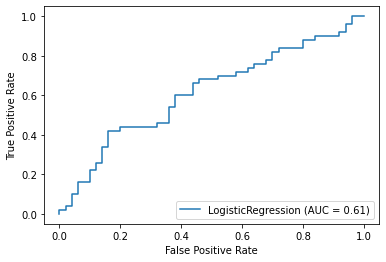

In [47]:
import sklearn.metrics as metrics
metrics.plot_roc_curve(lg, X_test, y_test)

In [48]:
metrics.roc_auc_score(y_test, pre_prob)

0.6148

### cross validation

In [52]:
cv_acc = cross_val_score(estimator = GaussianNB(),
                         X=X_train,
                         y=y_train,
                         cv=5,
                         n_jobs=-1)

In [53]:
print('Kfold Accuracy: %.2f%%' % (np.mean(cv_acc)*100))

Kfold Accuracy: 98.45%


# Support Vector Machine

In [54]:
from sklearn.svm import SVC
svm = SVC(C = 1, kernel = 'linear')
svm.fit(X_train,y_train)

SVC(C=1, kernel='linear')

In [55]:
pre = svm.predict(X_test)
(pre == y_test).mean()

0.62

### cross validation

In [56]:
cv_acc = cross_val_score(estimator = SVC(C = 1, kernel = 'linear'),
                         X=X_train,
                         y=y_train,
                         cv=5,
                         n_jobs=-1)

print('Kfold Accuracy: %.2f%%' % (np.mean(cv_acc)*100))

Kfold Accuracy: 98.45%


### GridSearch

In [57]:
from sklearn.model_selection import GridSearchCV

clf4 = SVC()

param_grid = [{'kernel': ['rbf'],
                'C': np.power(10., np.arange(-4, 4)),
                'gamma': np.power(10., np.arange(-5, 0))},
               {'kernel': ['linear'],
                'C': np.power(10., np.arange(-4, 4))}]

gs = GridSearchCV(estimator = clf4,
                  param_grid=param_grid,
                  #iid=False,
                  refit=True,
                  n_jobs=-1,
                  cv=10)

gs.fit(X_train, y_train)

print('Best Accuracy: %.2f%%' % (gs.best_score_*100))
print('Best Params:', gs.best_params_)

Best Accuracy: 98.76%
Best Params: {'C': 10.0, 'gamma': 0.01, 'kernel': 'rbf'}


In [58]:
from sklearn.svm import SVC
svm = SVC(C =  10.0, gamma =  0.01, kernel = 'rbf')
svm.fit(X_train,y_train)

SVC(C=10.0, gamma=0.01)

In [59]:
pre = svm.predict(X_test)
(pre == y_test).mean()

0.63

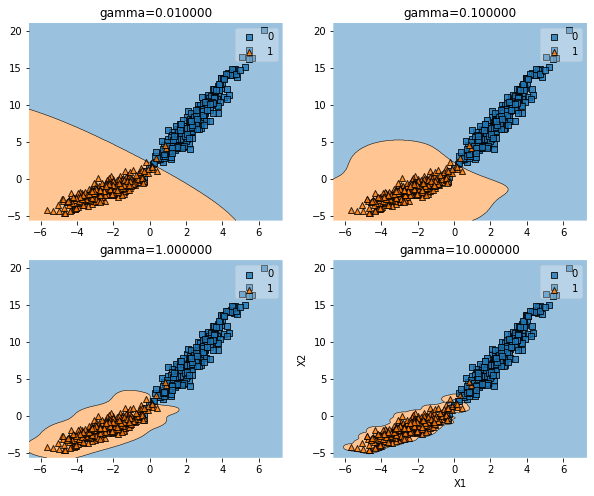

In [60]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
import matplotlib.pyplot as plt

gspec = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10,8))

for c, grd in zip([0.01, 0.1, 1.0, 10.], itertools.product([0, 1], repeat=2)):

    clf = SVC(C=10.0, 
              kernel='rbf', 
              degree=1, 
              gamma=c, 
              coef0=0.0, 
              shrinking=True, 
              probability=False, 
              tol=0.001, 
              cache_size=200, 
              class_weight=None, 
              verbose=False, 
              max_iter=-1, 
              decision_function_shape='ovr', 
              random_state=0)

    clf.fit(X_train.iloc[:,1:3], y_train)
    ax = plt.subplot(gspec[grd[0], grd[1]])
    fig = plot_decision_regions(X=np.array(X_train.iloc[:,1:3]), y=np.array(y_train), clf=clf)
    plt.title('gamma=%f' % c)


plt.xlabel('X1') 
plt.ylabel('X2')

plt.show()

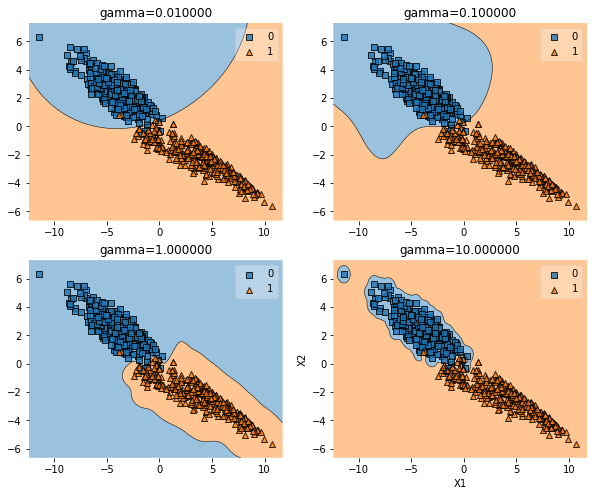

In [64]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
import matplotlib.pyplot as plt

gspec = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10,8))

for c, grd in zip([0.01, 0.1, 1.0, 10.], itertools.product([0, 1], repeat=2)):

    clf = SVC(C=10.0, 
              kernel='rbf', 
              degree=1, 
              gamma=c, 
              coef0=0.0, 
              shrinking=True, 
              probability=False, 
              tol=0.001, 
              cache_size=200, 
              class_weight=None, 
              verbose=False, 
              max_iter=-1, 
              decision_function_shape='ovr', 
              random_state=0)

    clf.fit(X_train.iloc[:,0:2], y_train)
    ax = plt.subplot(gspec[grd[0], grd[1]])
    fig = plot_decision_regions(X=np.array(X_train.iloc[:,0:2]), y=np.array(y_train), clf=clf)
    plt.title('gamma=%f' % c)


plt.xlabel('X1') 
plt.ylabel('X2')

#plt.show()

plt.savefig('plot_svm.jpg',dpi = 400)

In [63]:
pwd

'/Users/zyxu/Documents/py/cs760/project'